<a href="https://colab.research.google.com/github/rahulranjansah/data_mining/blob/main/datamania.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

def prep_ufo_data(df):

    def custom_to_datetime(date):
        if date[11:13] == "24":
            x = date[:11] + "23:59"
        elif date[10:12] == "24":
            x = date[:10] + "23:59"
        elif date[9:11] == "24":
            x = date[:9] +  "23:59"
        else:
            return pd.to_datetime(date)

        return pd.to_datetime(x)

    # numeric_val and cleaning position
    df["latitude"] = pd.to_numeric(df["latitude"], errors="coerce")
    df["lognitude"] = pd.to_numeric(df["longitude"], errors="coerce")
    df["duration (seconds)"] = pd.to_numeric(df["duration (seconds)"], errors="coerce")

    df.loc[:,"latitude"].replace({0.0: np.nan}, inplace=True)
    df.loc[:, "longitude"].replace({0.0: np.nan}, inplace=True)
    df.loc[:,"duration (seconds)"].replace({0.0: np.nan}, inplace=True)
    df.index = np.arange(0, len(df))

    # initialzing datetime series with time of report
    df["datetime"] = df["datetime"].apply(custom_to_datetime)
    df["date posted"] = pd.to_datetime(df["date posted"])




    df["month"] = pd.DatetimeIndex(df["datetime"]).month
    df["year"] = pd.DatetimeIndex(df["datetime"]).year
    df["day"] = pd.DatetimeIndex(df["datetime"]).day
    df["hour"] = pd.DatetimeIndex(df["datetime"]).hour

    return df



NameError: name 'df' is not defined

In [ ]:
# global imports

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn


# local imports
# from clean import prep_ufo_data

df = pd.read_csv("ufo_sightings.csv", on_bad_lines="skip", low_memory=False)
# print(df.head(50))
print(type(df["datetime"]))
df2 = prep_ufo_data(df)
print(type(df2["datetime"]))
print(df2.head(50))

FileNotFoundError: [Errno 2] No such file or directory: 'ufo_sightings.csv'

In [ ]:
filt = (df2["shape"].isin(["unknown", "light", "flare", "nan"]) | (df2["duration (seconds)"] > 3600) | (df2["duration (seconds)"] < 5))
df2 = df2[~filt]

##Locations
- lat and long parsing
- scatter plot




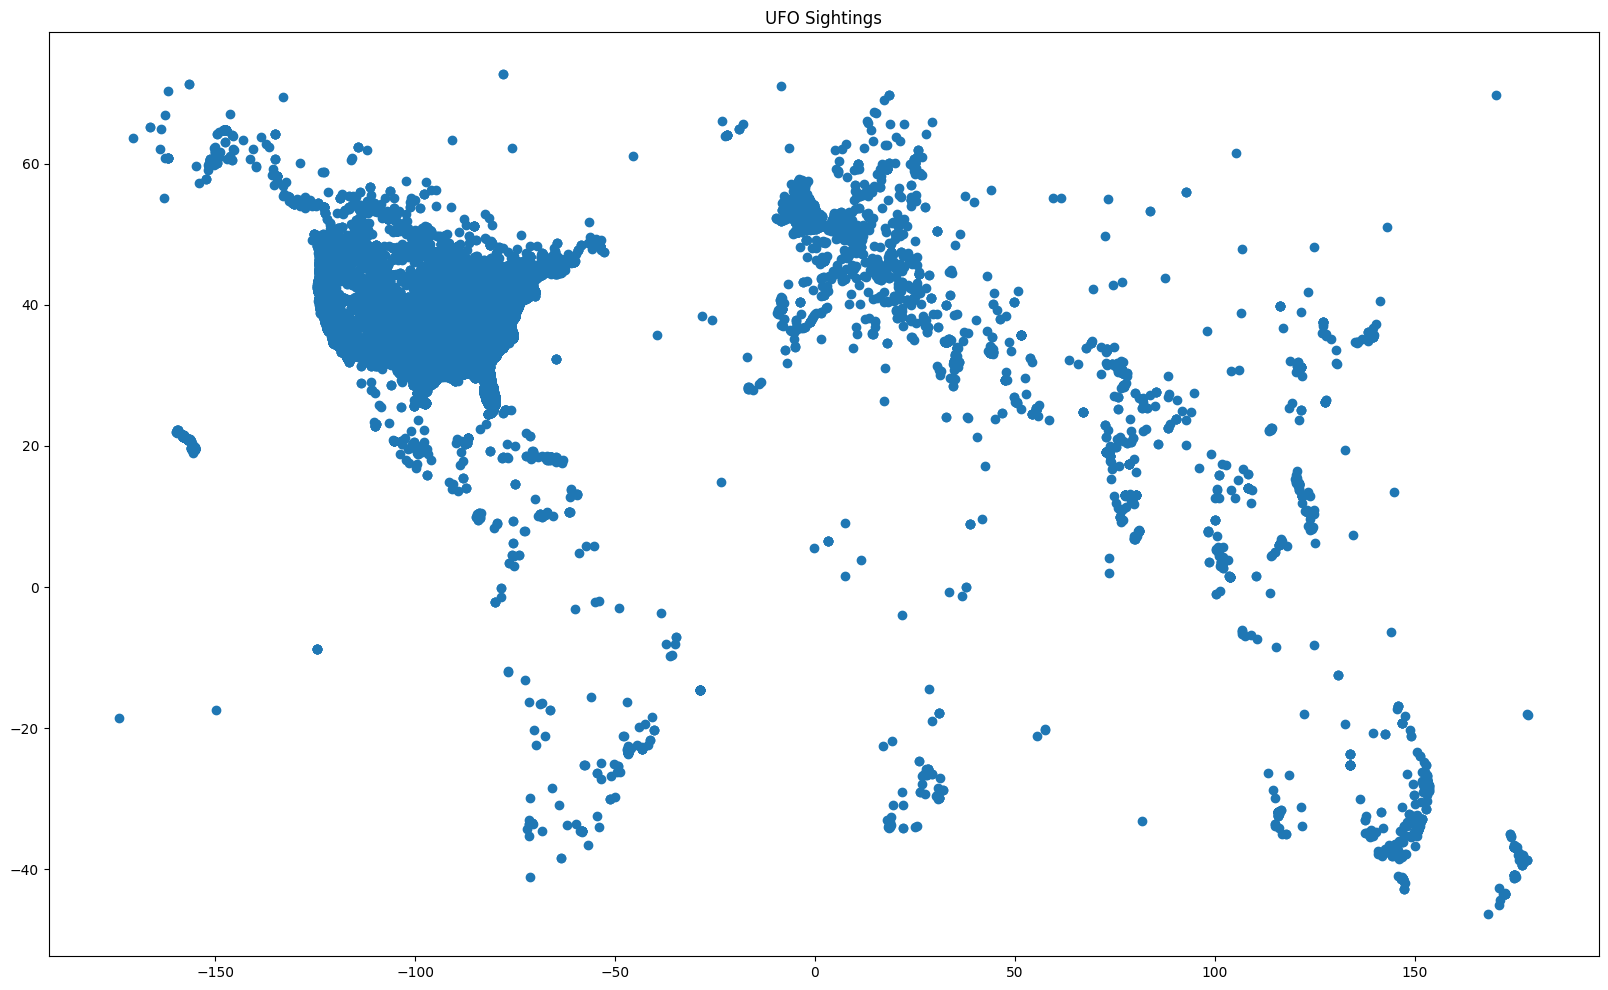

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20,12)

x = df2["lognitude"]
y = df2["latitude"]

ax.scatter(x,y)

ax.set_title("UFO Sightings")
plt.show()

In [ ]:
top_cities = (df2[["city", "datetime"]]
.groupby("city")
.count()
.rename(columns={"datetime":"cnt"})
.sort_values("cnt", ascending=False)
).head()

In [ ]:
# # Group the data by city and calculate the count and mean
city_group = df2.groupby('city').agg(
    Count=pd.NamedAgg(column='city', aggfunc='count'),
    Latitude=pd.NamedAgg(column='latitude', aggfunc='mean'),
    Longitude=pd.NamedAgg(column='longitude', aggfunc='mean')
).reset_index()

In [ ]:
import geopandas as gpd
import plotly.express as px
import plotly.io as py
# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create the plot
fig = px.scatter_geo(city_group, lat='Latitude', lon='Longitude',
                     projection='natural earth',
                     color='Count',
                     size='Count',
                     hover_name='city',
                     hover_data=['Count'],
                     color_continuous_scale='Viridis')

# Add the world map
fig.update_geos(showcountries=True, countrywidth=0.2)

# Layout
fig.update_layout(
    title_text='UFO Sightings',
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    )
)
py.write_html(fig, "ufo_sightings.html")

fig.show()

<ipython-input-18-e2036162dd10>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [ ]:
## Cities grouping to see how data looks like
- charts?

In [ ]:
df2.head(2)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,lognitude,month,year,day,hour
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111,-97.941111,10,1949,10,20
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.200000,-2.916667,-2.916667,10,1955,10,17


In [ ]:
top_cities = (df2[["city", "datetime"]]
.groupby("city")
.count()
.rename(columns={"datetime":"cnt"})
.sort_values("cnt", ascending=False)
).head(10)
print(top_cities)

             cnt
city            
seattle      357
phoenix      326
las vegas    266
los angeles  255
portland     253
san diego    236
houston      216
chicago      215
miami        169
orlando      163


<Axes: title={'center': 'Top Cities'}, xlabel='city'>

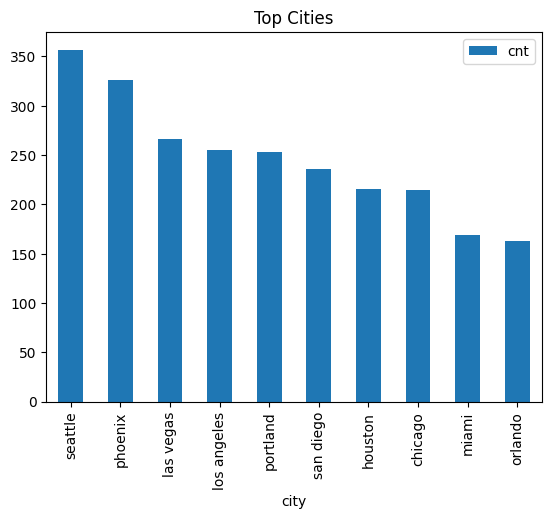

In [ ]:
top_cities.plot.bar(title="Top Cities") # quickplots using pandas, a thing to be considered in both of the data which ranks high is based on army bases presence.

In [ ]:
## Time of sightings
- When: years: time series line chart
- Weekdays: barchart
- Hours: barchart


SyntaxError: illegal target for annotation (<ipython-input-87-c5646d050c31>, line 2)

In [ ]:
import seaborn as sns

# Syntax
# sns.lineplot(x, y, data)


In [ ]:
year_group = (df2[["year", "datetime"]]
.groupby("year")
.count()
.rename(columns={"datetime":"cnt"})
).loc[:2013]


In [ ]:
year_group

,cnt
year,
1910,2
1916,1
1917,1
1920,1
1925,1
...,...
2009,3039
2010,3019
2011,3528


<Axes: xlabel='year', ylabel='cnt'>

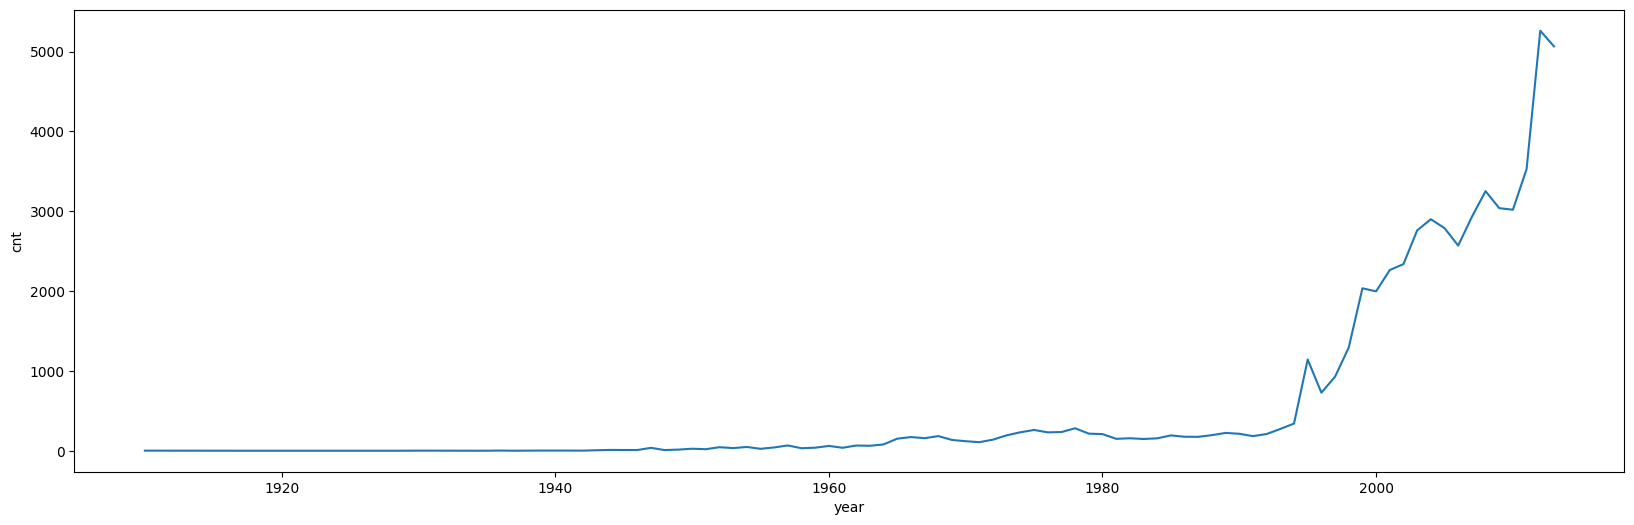

In [ ]:
plt.figure(figsize=(20,6))
sns.lineplot(x="year", y="cnt", data=year_group)


In [ ]:
import plotly.express as px

fig = px.line(year_group, x=year_group.index, y=year_group.cnt, title='Visibility of UFOs')
fig.show()
fig.write_html("ufo_count_over_years.html")

In [ ]:
# initialize dayofweek column with 0 as Monday.
df2.loc[:, "weekday"] = df2["datetime"].dt.day_name()

<ipython-input-28-e71cd4751d25>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df2.head(5)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,lognitude,month,year,day,hour,weekday
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111,-97.941111,10,1949,10,20,Monday
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.200000,-2.916667,-2.916667,10,1955,10,17,Monday
3,1956-10-10 21:00:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833,-96.645833,10,1956,10,21,Wednesday
5,1961-10-10 19:00:00,bristol,tn,us,sphere,300.0,5 minutes,My father is now 89 my brother 52 the girl wit...,2007-04-27,36.595000,-82.188889,-82.188889,10,1961,10,19,Tuesday
6,1965-10-10 21:00:00,penarth (uk/wales),NaN,gb,circle,180.0,about 3 mins,penarth uk circle 3mins stayed 30ft above m...,2006-02-14,51.434722,-3.180000,-3.180000,10,1965,10,21,Sunday


In [ ]:
df2['weekday'] = pd.Categorical(df2['weekday'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)

weekday_group = (df2[["weekday", "datetime"]]
.groupby("weekday", sort=False)
.count()
.rename(columns={"datetime":"cnt"})
)

print(weekday_group)

             cnt
weekday         
Monday      7156
Tuesday     7854
Wednesday   7906
Thursday    7925
Friday      8510
Saturday   10172
Sunday      8577


<ipython-input-30-19548fa1ab01>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fig = px.bar(weekday_group, x=weekday_group.index, y=weekday_group.cnt, labels={'x':'Weekday', 'cnt':'Count'}, title='Count of Sightings by Weekday')
plt.figure(figsize=(10,6))
fig.show()

<Figure size 1000x600 with 0 Axes>

In [ ]:
month_group = (df2[["month", "datetime"]]
.groupby("month")
.count()
.rename(columns={"datetime":"cnt"})
)


In [ ]:
month_group

,cnt
month,
1,4157
2,3287
3,3968
4,4010
5,3907
6,6223
7,6839
8,6114
9,5397


<ipython-input-34-aafbb41aa797>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'UFO observation peak months')

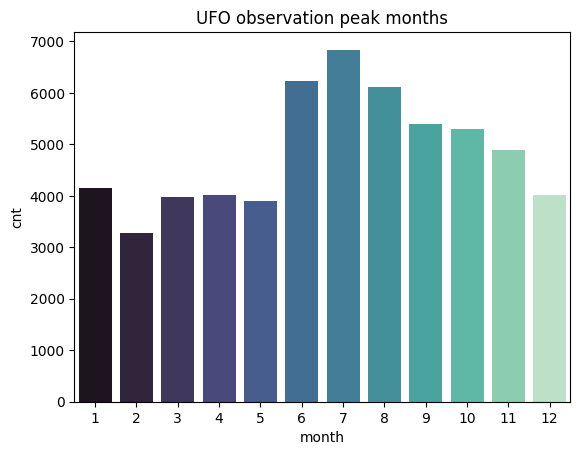

In [ ]:
sns.barplot(x=month_group.index, y=month_group.cnt, data=month_group, palette="mako")
plt.title("UFO observation peak months")

In [ ]:
hour_group = (df2[["hour", "datetime"]]
.groupby("hour")
.count()
.rename(columns={"datetime":"cnt"})
)

In [ ]:
print(hour_group)

       cnt
hour      
0     2886
1     2201
2     1592
3     1308
4      994
5     1009
6      840
7      749
8      669
9      807
10     960
11     982
12    1265
13    1232
14    1213
15    1302
16    1390
17    2042
18    2967
19    4309
20    5954
21    7791
22    7296
23    6342


<ipython-input-37-3b8d55a20d36>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'UFO observation peak hours')

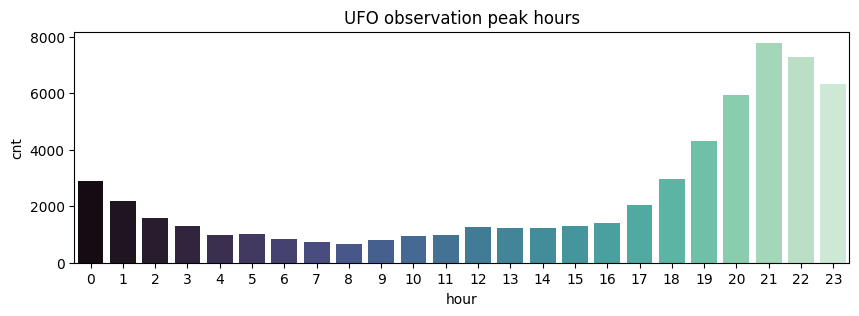

In [ ]:
plt.figure(figsize=(10,3))
sns.barplot(x=hour_group.index, y=hour_group.cnt, data=hour_group, palette="mako")
plt.title("UFO observation peak hours")

In [ ]:
df2.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,lognitude,month,year,day,hour,weekday
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111,-97.941111,10,1949,10,20,Monday
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.200000,-2.916667,-2.916667,10,1955,10,17,Monday
3,1956-10-10 21:00:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833,-96.645833,10,1956,10,21,Wednesday
5,1961-10-10 19:00:00,bristol,tn,us,sphere,300.0,5 minutes,My father is now 89 my brother 52 the girl wit...,2007-04-27,36.595000,-82.188889,-82.188889,10,1961,10,19,Tuesday
6,1965-10-10 21:00:00,penarth (uk/wales),NaN,gb,circle,180.0,about 3 mins,penarth uk circle 3mins stayed 30ft above m...,2006-02-14,51.434722,-3.180000,-3.180000,10,1965,10,21,Sunday


In [ ]:
df2["shape"].unique()

array(['cylinder', 'circle', 'sphere', 'disk', 'fireball', 'oval',
       'other', 'rectangle', 'chevron', 'triangle', 'formation', 'cigar',
       nan, 'changing', 'flash', 'diamond', 'egg', 'cross', 'teardrop',
       'cone', 'pyramid', 'delta', 'round', 'crescent', 'hexagon',
       'changed'], dtype=object)

In [ ]:
df2["country"].unique()

array(['us', 'gb', nan, 'ca', 'au', 'de'], dtype=object)

In [ ]:
country_group = (df2[["country", "datetime"]]
.groupby("country")
.count()
.rename(columns={"datetime":"cnt"})
)


In [ ]:
nan_count = df2["country"].isna().sum()
print(nan_count)

8171


In [ ]:
filt = (df2["shape"].isin(["unknown", "light", "flare", "nan"]))
shape_filtered_df = df2[~filt]



In [ ]:
shape_filtered_df["shape"].unique()

array(['cylinder', 'circle', 'sphere', 'disk', 'fireball', 'oval',
       'other', 'rectangle', 'chevron', 'triangle', 'formation', 'cigar',
       nan, 'changing', 'flash', 'diamond', 'egg', 'cross', 'teardrop',
       'cone', 'pyramid', 'delta', 'round', 'crescent', 'hexagon',
       'changed'], dtype=object)

In [ ]:
shape_filtered_df.shape

(58100, 17)

In [ ]:
type(df2["duration (seconds)"])

pandas.core.series.Series

In [ ]:
duration_filt_df.shape

(79737, 16)

In [ ]:
filt = (df2["shape"].isin(["unknown", "light", "flare", "nan"]) | (df2["duration (seconds)"] > 3600) | (df2["duration (seconds)"] < 5))
filt_df = df[~filt]

In [ ]:
filt_df.shape

(58100, 16)

In [ ]:
import re

In [ ]:
from typing import Counter
comments = filt_df["comments"]
words = []
for comment in comments:
  if isinstance(comment, str):
    words.extend(re.findall(r'\b\w+\b', comment.lower()))
word_count = Counter(words)

print(word_count.most_common(50))


[('44', 31923), ('the', 26261), ('in', 24147), ('a', 23326), ('and', 18435), ('of', 14823), ('i', 12750), ('object', 11980), ('lights', 11709), ('to', 11527), ('sky', 11005), ('over', 10065), ('was', 9943), ('it', 8554), ('light', 8253), ('at', 8100), ('with', 8013), ('on', 7580), ('bright', 7358), ('shaped', 6729), ('orange', 6580), ('moving', 5714), ('red', 5539), ('my', 5497), ('white', 5234), ('from', 5194), ('saw', 5099), ('then', 4900), ('craft', 4836), ('ufo', 4594), ('seen', 4277), ('very', 4090), ('flying', 4032), ('like', 4007), ('that', 3800), ('quot', 3581), ('large', 3445), ('no', 3305), ('objects', 3295), ('triangle', 3235), ('3', 3221), ('two', 3056), ('we', 3007), ('for', 2916), ('shape', 2910), ('hovering', 2782), ('were', 2759), ('about', 2739), ('night', 2679), ('up', 2650)]


In [ ]:
# string type define comments
comments = filt_df["comments"].apply(lambda x: str(x))


In [ ]:
import nltk

nltk.download("punkt")
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk import pos_tag


filt_df["comments"] = filt_df["comments"].astype(str)

# Extract the 'comments' column
comments = filt_df['comments']

# Tokenize the comments
words = word_tokenize(' '.join(comments))


# Remove punctuation and convert to lower case
words = [word.lower() for word in words if word.isalpha()]
custom_stop_words = ["i", "we", "a", "&", "the", "to", "as", "i", "we", "or", "ISS"]

# Remove stopwords
stop_words = set(stopwords.words('english') + custom_stop_words)
words = [word for word in words if word not in stop_words]


# Part-of-speech tagging
tagged = nltk.pos_tag(words)

# Filter out prepositions, verbs, etc.
filtered_words = [word for word, pos in tagged if pos not in ('IN', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ')]

# Count the frequency of each word
word_counts = Counter(filtered_words)



<ipython-input-203-70d53f24ce5a>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Display the most common words
print(word_counts.most_common(100))

[('lights', 11497), ('sky', 10174), ('object', 9929), ('light', 7401), ('bright', 5842), ('orange', 4996), ('white', 4837), ('craft', 4645), ('ufo', 4389), ('red', 4143), ('large', 3433), ('quot', 3185), ('two', 3040), ('objects', 2967), ('triangle', 2796), ('shape', 2734), ('night', 2649), ('one', 2603), ('triangular', 2352), ('formation', 2263), ('north', 2146), ('three', 1984), ('green', 1973), ('west', 1961), ('slowly', 1956), ('south', 1950), ('east', 1893), ('blue', 1879), ('fast', 1850), ('fireball', 1847), ('low', 1836), ('high', 1788), ('black', 1759), ('ball', 1682), ('speed', 1597), ('sphere', 1591), ('sound', 1501), ('round', 1499), ('nuforc', 1416), ('note', 1412), ('circular', 1405), ('star', 1370), ('strange', 1333), ('oval', 1300), ('silent', 1272), ('small', 1254), ('saw', 1229), ('minutes', 1198), ('pd', 1177), ('silver', 1164), ('slow', 1080), ('back', 1017), ('house', 990), ('area', 982), ('disk', 972), ('away', 956), ('huge', 953), ('aircraft', 952), ('cigar', 917)

In [ ]:
from wordcloud import WordCloud, STOPWORDS

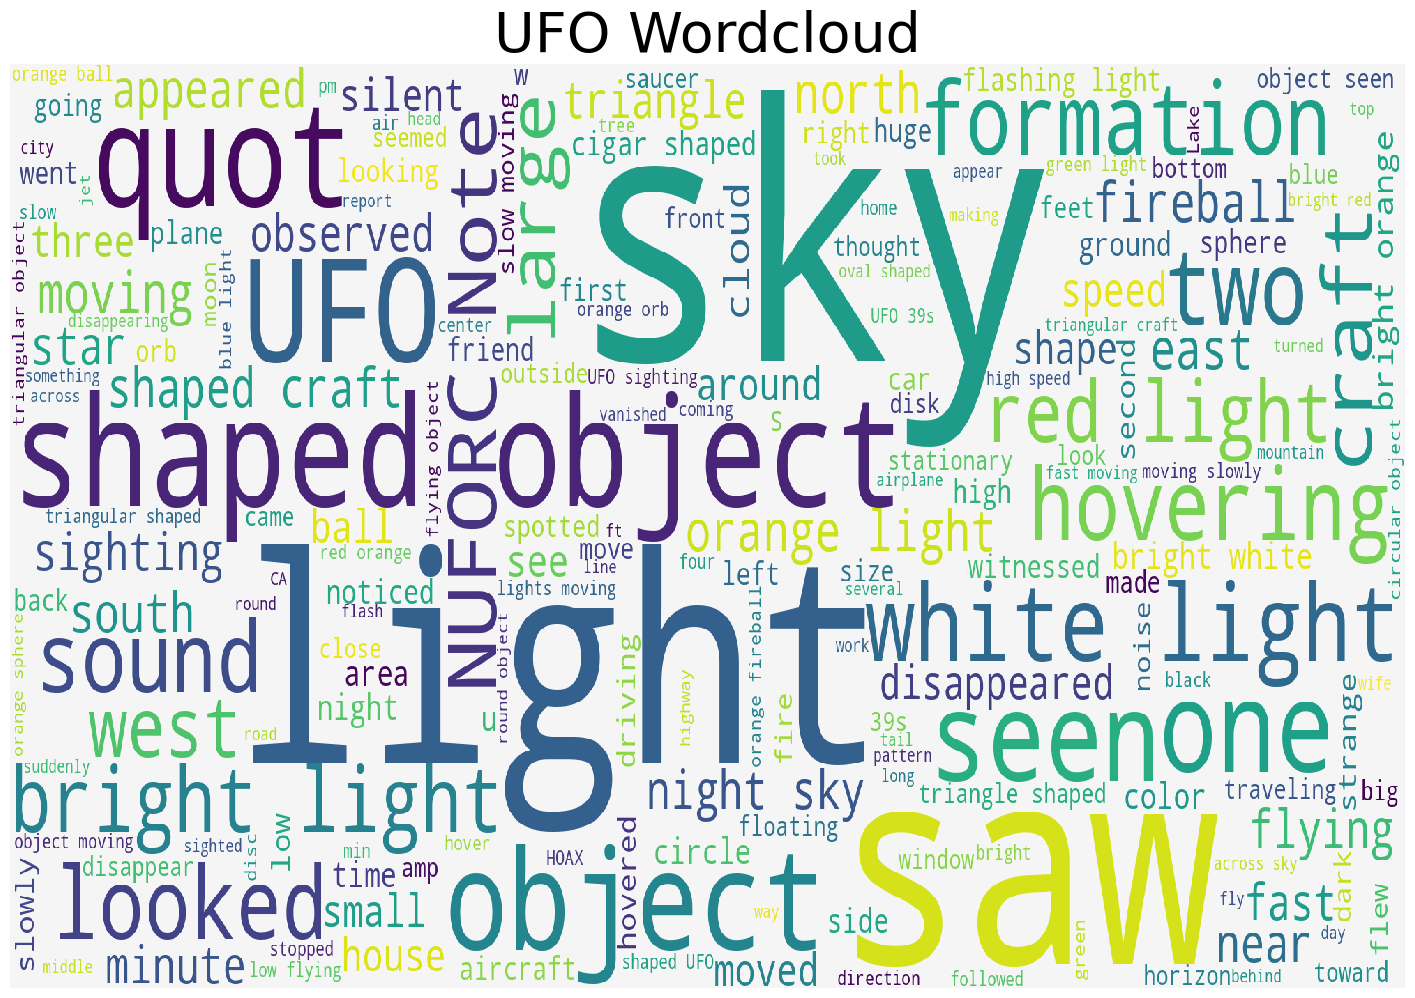

In [ ]:
cmt = [item for item in filt_df.comments.dropna()]

cmt = " ".join(cmt)

plt.figure(figsize=(18,12))

wordcloud = WordCloud(background_color='whitesmoke', width=2000, height=1000,
                      stopwords=None).generate(cmt)
plt.imshow(wordcloud, interpolation="nearest", aspect='auto')
plt.axis('off')
plt.savefig('wordcloud.png')
plt.title("UFO Wordcloud", size=40)

plt.show()

In [49]:

df = pd.read_csv("military-bases.csv", sep=";")

df[["latitude", "longitude"]] = df["Geo Point"].str.split(",", expand=True)
df["latitude"] = pd.to_numeric(df["latitude"], errors="coerce")
df["longitude"] = pd.to_numeric(df["longitude"], errors="coerce")

print(df)

base_counts = df.groupby('State Terr').size()

# Create a DataFrame with the mean latitude and longitude for each state
df_mean = df.groupby('State Terr')[['latitude', 'longitude']].mean().reset_index()


df_merged = pd.merge(df_mean, base_counts.rename('count'), left_on='State Terr', right_index=True)
fig = px.scatter_geo(df_merged, lat='latitude', lon='longitude', color='count',
                     hover_name='State Terr', size='count',
                     projection='natural earth', title='Count of Army Bases in Different States')
fig.show()

                         Geo Point  \
0    31.2309993833, -85.6506347178   
1    31.8157331822, -85.6497984957   
2    33.1594636742, -106.425696182   
3    37.0130203962, -76.3043760544   
4    21.3866284869, -157.905641308   
..                             ...   
771  44.3965120263, -70.9365409929   
772  33.7730532491, -118.301027333   
773  32.9489566811, -115.750656601   
774  18.5094327133, -67.0991288097   
775  37.3063972082, -116.198549994   

                                             Geo Shape  OBJECTID_1  OBJECTID  \
0    {"coordinates": [[[-85.65462565497243, 31.2341...          26        65   
1    {"coordinates": [[[-85.65268851262239, 31.8128...          33        73   
2    {"coordinates": [[[-106.27973443186896, 33.910...          66       261   
3    {"coordinates": [[[[-76.29312038151345, 37.032...         114       899   
4    {"coordinates": [[[-157.8989279212737, 21.3927...         161      1237   
..                                                 ...         